In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("esg_scores_regression.csv")

In [7]:
df

Company          Sector Country  Market_Cap_Billions  \
0      Company_1         Finance  Canada                59.72   
1      Company_2  Consumer Goods     USA                46.10   
2      Company_3      Healthcare      UK                52.91   
3      Company_4  Consumer Goods     USA                67.85   
4      Company_5  Consumer Goods   Japan                25.45   
..           ...             ...     ...                  ...   
295  Company_296         Finance     USA                16.24   
296  Company_297       Utilities  Canada               123.37   
297  Company_298         Finance   Japan                53.88   
298  Company_299       Utilities      UK                53.28   
299  Company_300      Healthcare      UK                71.77   

     Carbon_Emissions  Renewable_Energy_Usage  Employee_Satisfaction  \
0              124.05                   12.69                  56.23   
1              111.19                   75.29                  58.32   
2               60.48                   56.59                  59.81   
3              123.57                   10.09                  74.77   
4              194.10                   27.57                  59.43   
..                ...                     ...                    ...   
295            178.87                   37.67                  82.04   
296             95.24                   66.34                  41.92   
297            113.95                   14.02                  85.09   
298            130.39                   45.84                  63.07   
299            109.33                    5.43                  71.86   

     Diversity_Ratio  Board_Independence  CEO_Compensation_Ratio    ROE  \
0               0.43                0.67                  131.74  12.49   
1               0.55                0.65                   30.06  15.70   
2               0.42                0.45                  152.17  17.90   
3               0.41                0.73                   33.50   4.92   
4               0.13                0.81                  141.30   5.95   
..               ...                 ...                     ...    ...   
295             0.49                0.80                   87.29  11.20   
296             0.11                0.81                  151.27  12.50   
297             0.13                0.83                  122.31  12.36   
298             0.33                0.86                   55.54  10.38   
299             0.55                0.62                  109.86  13.71   

     ESG_Score  
0        36.80  
1        48.71  
2        47.42  
3        44.07  
4        27.04  
..         ...  
295      38.83  
296      38.20  
297      40.20  
298      46.87  
299      36.55  

[300 rows x 12 columns]

2. Exploratory Data Analysis

1). Dataset Overview

Dataset Head -- To know the Top 5 rows

In [12]:
df.head(5)

Company          Sector Country  Market_Cap_Billions  Carbon_Emissions  \
0  Company_1         Finance  Canada                59.72            124.05   
1  Company_2  Consumer Goods     USA                46.10            111.19   
2  Company_3      Healthcare      UK                52.91             60.48   
3  Company_4  Consumer Goods     USA                67.85            123.57   
4  Company_5  Consumer Goods   Japan                25.45            194.10   

   Renewable_Energy_Usage  Employee_Satisfaction  Diversity_Ratio  \
0                   12.69                  56.23             0.43   
1                   75.29                  58.32             0.55   
2                   56.59                  59.81             0.42   
3                   10.09                  74.77             0.41   
4                   27.57                  59.43             0.13   

   Board_Independence  CEO_Compensation_Ratio    ROE  ESG_Score  
0                0.67                  131.74  12.49      36.80  
1                0.65                   30.06  15.70      48.71  
2                0.45                  152.17  17.90      47.42  
3                0.73                   33.50   4.92      44.07  
4                0.81                  141.30   5.95      27.04

Dataset Tail -- To know the Bottom 5 rows

In [15]:
df.tail(5)

Company      Sector Country  Market_Cap_Billions  Carbon_Emissions  \
295  Company_296     Finance     USA                16.24            178.87   
296  Company_297   Utilities  Canada               123.37             95.24   
297  Company_298     Finance   Japan                53.88            113.95   
298  Company_299   Utilities      UK                53.28            130.39   
299  Company_300  Healthcare      UK                71.77            109.33   

     Renewable_Energy_Usage  Employee_Satisfaction  Diversity_Ratio  \
295                   37.67                  82.04             0.49   
296                   66.34                  41.92             0.11   
297                   14.02                  85.09             0.13   
298                   45.84                  63.07             0.33   
299                    5.43                  71.86             0.55   

     Board_Independence  CEO_Compensation_Ratio    ROE  ESG_Score  
295                0.80                   87.29  11.20      38.83  
296                0.81                  151.27  12.50      38.20  
297                0.83                  122.31  12.36      40.20  
298                0.86                   55.54  10.38      46.87  
299                0.62                  109.86  13.71      36.55

Dataset Shape : To know number of Rows & Columns

In [18]:
df.shape

(300, 12)

In [20]:
print("Number of Rows:", df.shape[0])

Number of Rows: 300


In [22]:
print("Number of Columns:", df.shape[1])

Number of Columns: 12


Dataset Information & Data types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 300 non-null    object 
 1   Sector                  300 non-null    object 
 2   Country                 300 non-null    object 
 3   Market_Cap_Billions     300 non-null    float64
 4   Carbon_Emissions        300 non-null    float64
 5   Renewable_Energy_Usage  300 non-null    float64
 6   Employee_Satisfaction   300 non-null    float64
 7   Diversity_Ratio         300 non-null    float64
 8   Board_Independence      300 non-null    float64
 9   CEO_Compensation_Ratio  300 non-null    float64
 10  ROE                     300 non-null    float64
 11  ESG_Score               300 non-null    float64
dtypes: float64(9), object(3)
memory usage: 28.3+ KB


Dataset Description -- Statistical summary for both Numerical & Categorical columns

In [28]:
df.describe(include='all')

Company   Sector Country  Market_Cap_Billions  Carbon_Emissions  \
count         300      300     300           300.000000        300.000000   
unique        300        6       6                  NaN               NaN   
top     Company_1  Finance   Japan                  NaN               NaN   
freq            1       64      55                  NaN               NaN   
mean          NaN      NaN     NaN            50.054033        104.703433   
std           NaN      NaN     NaN            28.288167         47.981334   
min           NaN      NaN     NaN             5.000000         10.000000   
25%           NaN      NaN     NaN            27.197500         72.592500   
50%           NaN      NaN     NaN            49.535000        102.555000   
75%           NaN      NaN     NaN            68.697500        134.862500   
max           NaN      NaN     NaN           142.370000        231.620000   

        Renewable_Energy_Usage  Employee_Satisfaction  Diversity_Ratio  \
count               300.000000             300.000000       300.000000   
unique                     NaN                    NaN              NaN   
top                        NaN                    NaN              NaN   
freq                       NaN                    NaN              NaN   
mean                 42.770233              64.531533         0.347700   
std                  22.433375              14.203341         0.144832   
min                   5.370000              40.380000         0.100000   
25%                  21.987500              52.035000         0.220000   
50%                  43.325000              64.235000         0.360000   
75%                  61.382500              75.987500         0.470000   
max                  79.960000              89.830000         0.600000   

        Board_Independence  CEO_Compensation_Ratio         ROE   ESG_Score  
count           300.000000              300.000000  300.000000  300.000000  
unique                 NaN                     NaN         NaN         NaN  
top                    NaN                     NaN         NaN         NaN  
freq                   NaN                     NaN         NaN         NaN  
mean              0.653533              100.048133   10.062067   42.934167  
std               0.142707               37.335340    4.788520    7.248658  
min               0.400000               30.000000   -3.020000   23.010000  
25%               0.540000               75.335000    6.697500   37.867500  
50%               0.660000               99.240000   10.055000   42.475000  
75%               0.770000              125.445000   13.402500   47.832500  
max               0.900000              225.510000   25.000000   66.270000

2). Missing Values & their count percentages

In [31]:
missing_count = df.isnull().sum()

In [33]:
print(missing_count)

Company                   0
Sector                    0
Country                   0
Market_Cap_Billions       0
Carbon_Emissions          0
Renewable_Energy_Usage    0
Employee_Satisfaction     0
Diversity_Ratio           0
Board_Independence        0
CEO_Compensation_Ratio    0
ROE                       0
ESG_Score                 0
dtype: int64


In [35]:
percentage_missing = (missing_count/len(df))*100

In [37]:
print(percentage_missing)

Company                   0.0
Sector                    0.0
Country                   0.0
Market_Cap_Billions       0.0
Carbon_Emissions          0.0
Renewable_Energy_Usage    0.0
Employee_Satisfaction     0.0
Diversity_Ratio           0.0
Board_Independence        0.0
CEO_Compensation_Ratio    0.0
ROE                       0.0
ESG_Score                 0.0
dtype: float64


3). Target variable distribution plot -- Histogram
-- Verifying the skewness and outliers

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
target_col = 'ESG_Score'

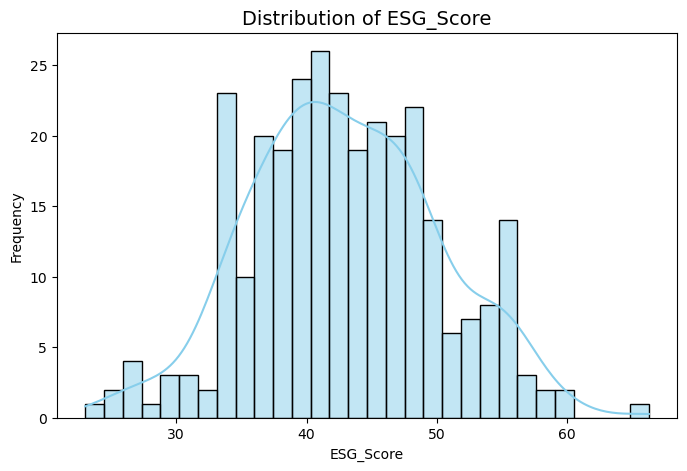

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df[target_col], kde=True, bins=30, color='skyblue')

plt.title(f'Distribution of {target_col}', fontsize=14)
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.show()

4). Numerical Features -- Univariate Analysis

In [46]:
numerical_col = df.select_dtypes(include=['int64', 'float64'])

In [49]:
print(numerical_col)

     Market_Cap_Billions  Carbon_Emissions  Renewable_Energy_Usage  \
0                  59.72            124.05                   12.69   
1                  46.10            111.19                   75.29   
2                  52.91             60.48                   56.59   
3                  67.85            123.57                   10.09   
4                  25.45            194.10                   27.57   
..                   ...               ...                     ...   
295                16.24            178.87                   37.67   
296               123.37             95.24                   66.34   
297                53.88            113.95                   14.02   
298                53.28            130.39                   45.84   
299                71.77            109.33                    5.43   

     Employee_Satisfaction  Diversity_Ratio  Board_Independence  \
0                    56.23             0.43                0.67   
1                    58.3

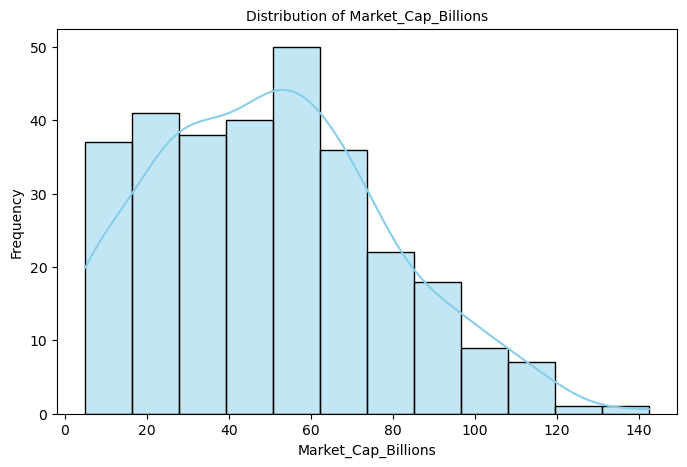

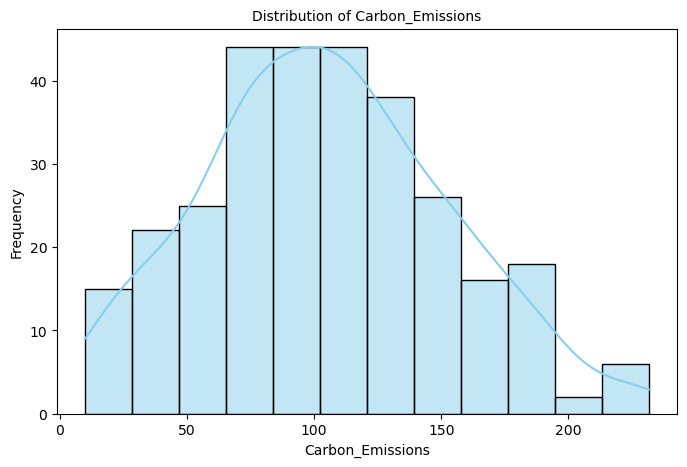

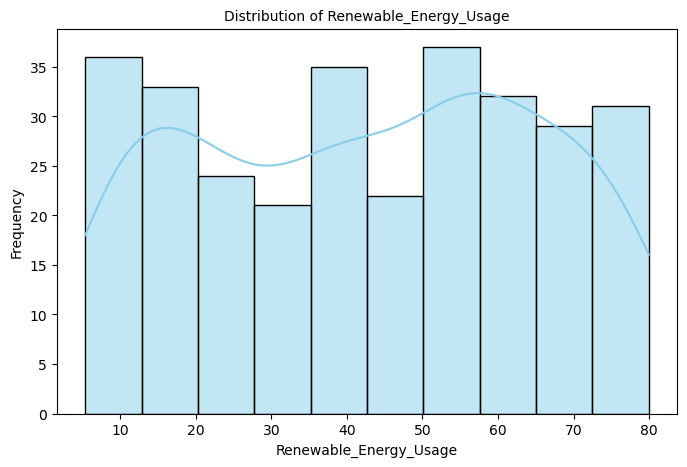

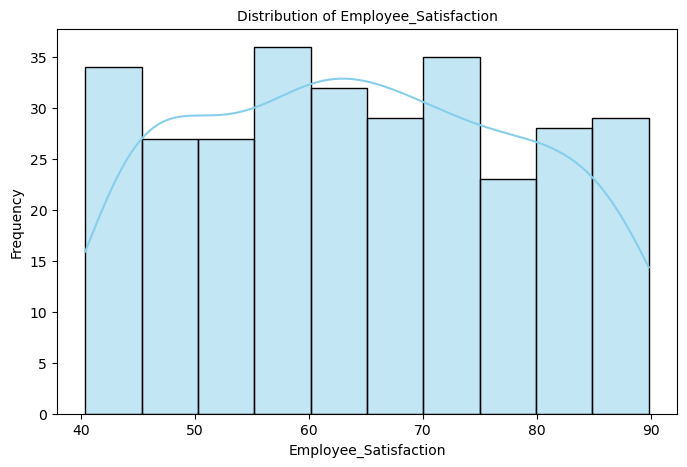

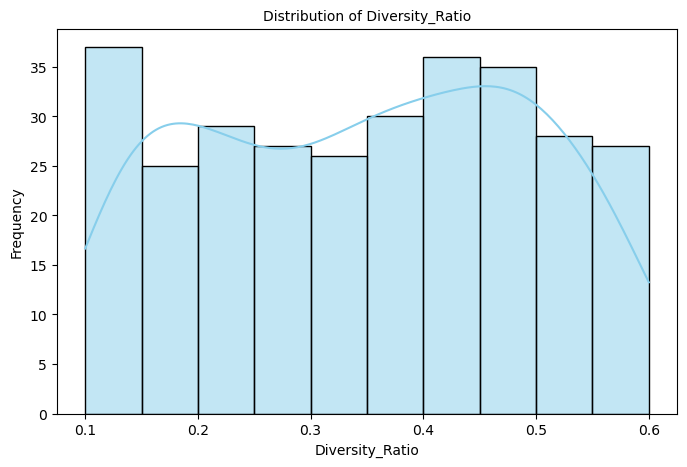

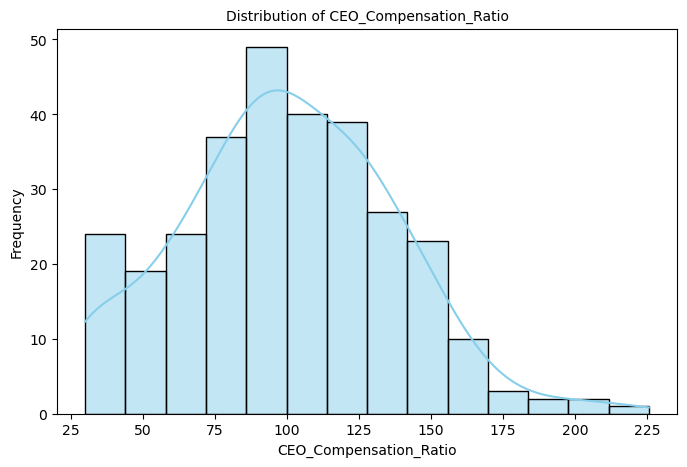

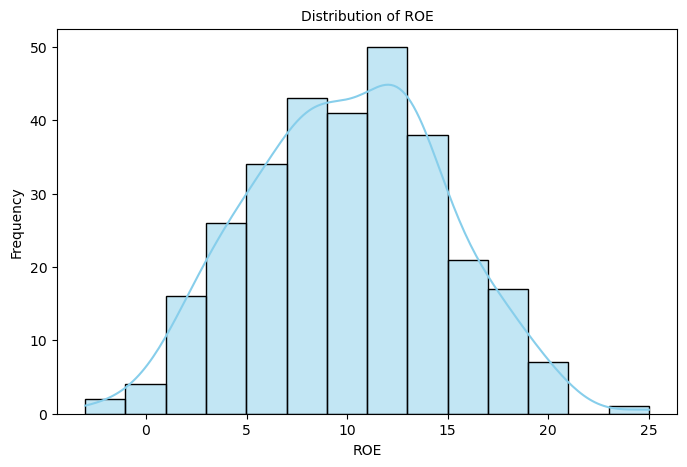

In [51]:
for col in numerical_col:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, color='skyblue')

    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

5). Categorical Features -- Univariate Analysis

In [53]:
categorical_col = df.select_dtypes(include=['object', 'category'])

In [54]:
categorical_col

Company          Sector Country
0      Company_1         Finance  Canada
1      Company_2  Consumer Goods     USA
2      Company_3      Healthcare      UK
3      Company_4  Consumer Goods     USA
4      Company_5  Consumer Goods   Japan
..           ...             ...     ...
295  Company_296         Finance     USA
296  Company_297       Utilities  Canada
297  Company_298         Finance   Japan
298  Company_299       Utilities      UK
299  Company_300      Healthcare      UK

[300 rows x 3 columns]

C:\Users\venuk\AppData\Local\Temp\ipykernel_21572\1199365129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],color='skyblue',palette='Set2')


C:\Users\venuk\AppData\Local\Temp\ipykernel_21572\1199365129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],color='skyblue',palette='Set2')


C:\Users\venuk\AppData\Local\Temp\ipykernel_21572\1199365129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col],color='skyblue',palette='Set2')


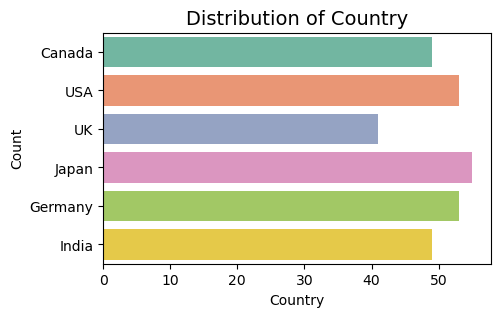

In [55]:
for col in categorical_col:
    plt.figure(figsize=(5,3))
    sns.countplot(df[col],color='skyblue',palette='Set2')

    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

6). Duplicate data detection
-- check duplicates
-- view duplicates if needed

In [57]:
#view duplicates, if needed
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Company, Sector, Country, Market_Cap_Billions, Carbon_Emissions, Renewable_Energy_Usage, Employee_Satisfaction, Diversity_Ratio, Board_Independence, CEO_Compensation_Ratio, ROE, ESG_Score]
Index: []


In [60]:
#Check number of duplicates
df.duplicated().sum()

0

7). Outlier Detection using Boxplots

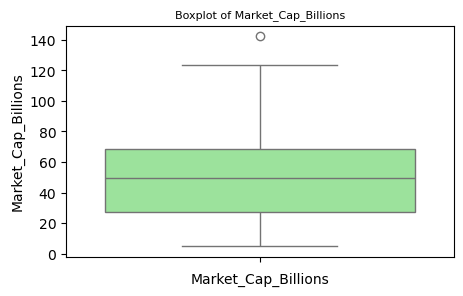

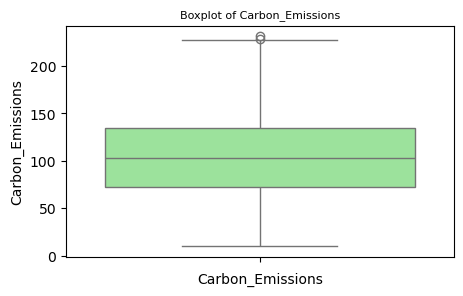

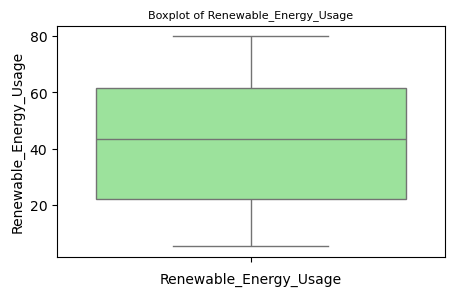

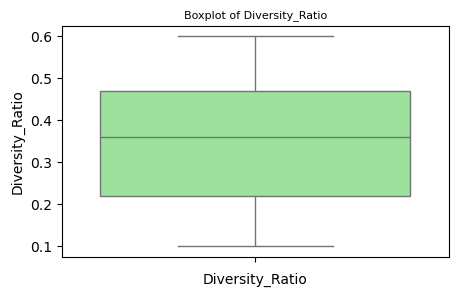

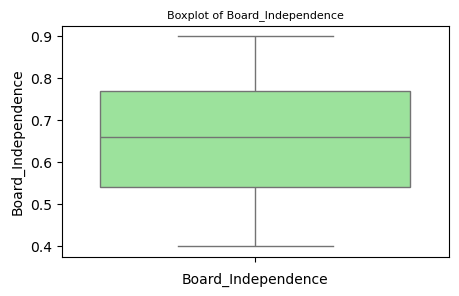

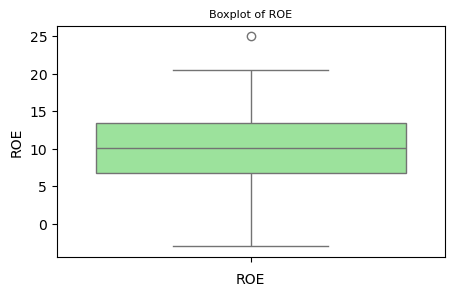

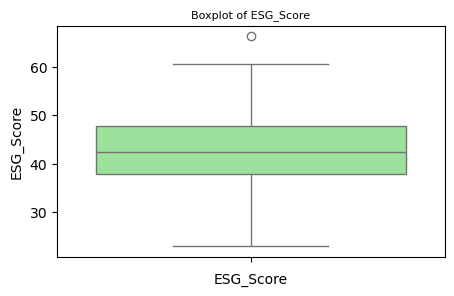

In [63]:
for col in numerical_col:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col],color='lightgreen')

    plt.title(f'Boxplot of {col}', fontsize=8)
    plt.xlabel(col)
    plt.show()

8). Correlation Heatmap
-- To identify highly correlated variables, causes Multicollinearity problems

In [65]:
corr_matrix = numerical_col.corr()
print(corr_matrix)

                        Market_Cap_Billions  Carbon_Emissions  \
Market_Cap_Billions                1.000000         -0.033157   
Carbon_Emissions                  -0.033157          1.000000   
Renewable_Energy_Usage             0.074107         -0.103168   
Employee_Satisfaction              0.038554         -0.140590   
Diversity_Ratio                    0.054437         -0.112327   
Board_Independence                 0.035135          0.044784   
CEO_Compensation_Ratio            -0.028059         -0.035858   
ROE                                0.042289         -0.029726   
ESG_Score                          0.060043         -0.640228   

                        Renewable_Energy_Usage  Employee_Satisfaction  \
Market_Cap_Billions                   0.074107               0.038554   
Carbon_Emissions                     -0.103168              -0.140590   
Renewable_Energy_Usage                1.000000              -0.047926   
Employee_Satisfaction                -0.047926           

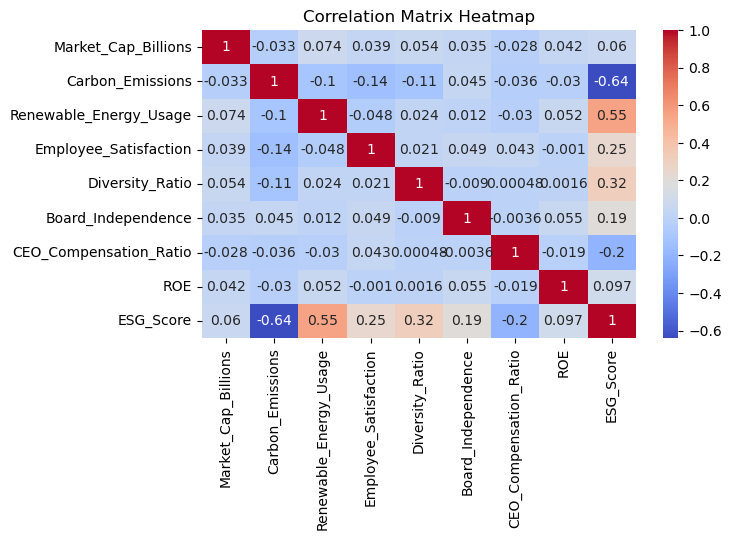

In [66]:
plt.figure(figsize=(7,4))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

9). Multicollinearity Check -- Variance Inflation Factor

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = numerical_col.dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor (X.values, i) for i in range(X.shape[1])]
print(vif_data)

                  feature        VIF
0     Market_Cap_Billions   4.128094
1        Carbon_Emissions   6.782058
2  Renewable_Energy_Usage   8.646001
3   Employee_Satisfaction  27.104096
4         Diversity_Ratio   8.770363
5      Board_Independence  27.487293
6  CEO_Compensation_Ratio   7.436232
7                     ROE   5.509725
8               ESG_Score  84.052792


10). Correlation with Target Variable

In [70]:
correlation_with_target = numerical_col.corr()[target_col].sort_values(ascending=False)
print(correlation_with_target)

ESG_Score                 1.000000
Renewable_Energy_Usage    0.551016
Diversity_Ratio           0.316971
Employee_Satisfaction     0.249658
Board_Independence        0.192816
ROE                       0.096769
Market_Cap_Billions       0.060043
CEO_Compensation_Ratio   -0.204722
Carbon_Emissions         -0.640228
Name: ESG_Score, dtype: float64


11). Bivariate Analysis -- Numerical features vs Target

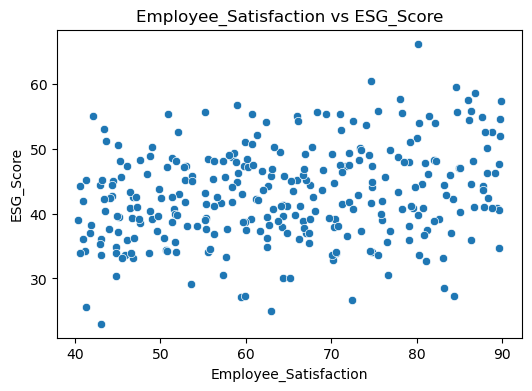

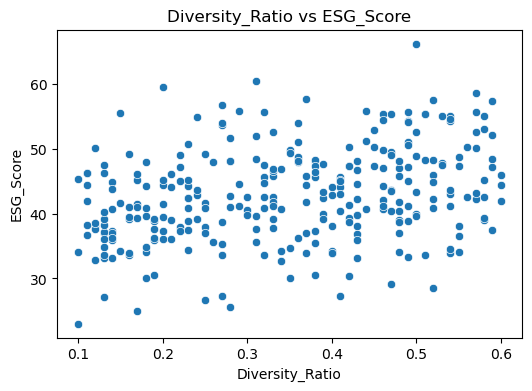

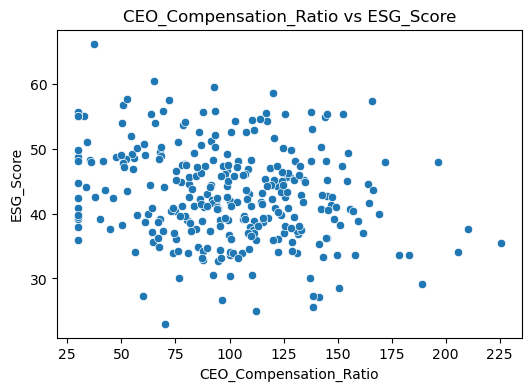

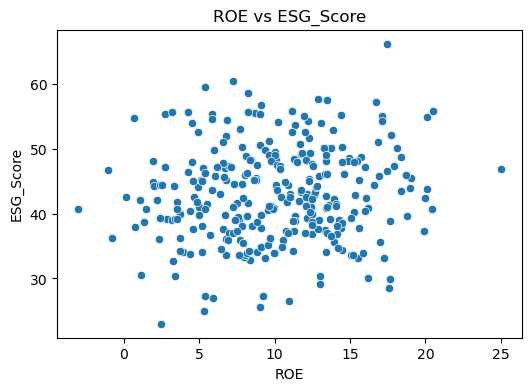

In [75]:
for col in numerical_col:
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target_col])
        plt.title(f'{col} vs {target_col}')
        plt.show()

12). Bivariate Analysis -- Categorical features vs Target

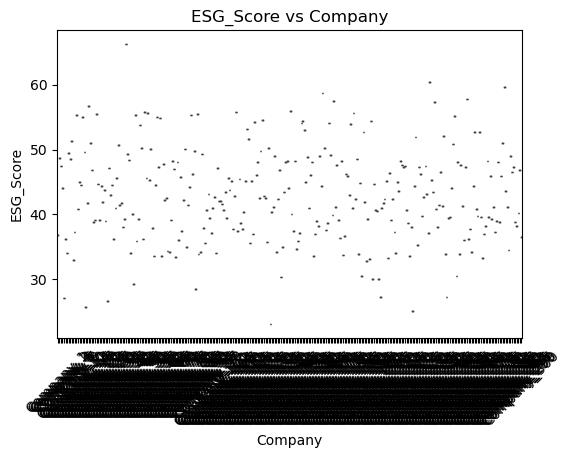

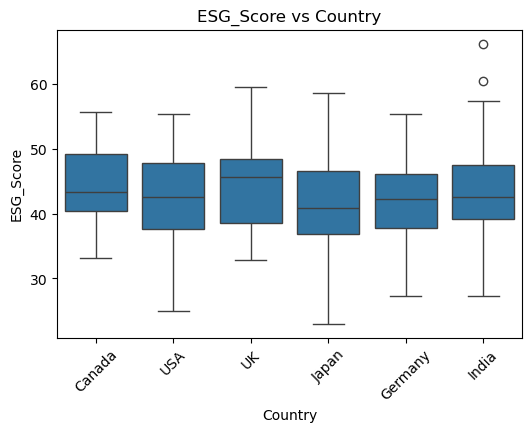

In [79]:
for col in categorical_col:
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], y=df[target_col])
        plt.title(f'{target_col} vs {col}')
        plt.xticks(rotation=45)
        plt.show()

13). Skewness and Kurtosis check

In [84]:
for col in numerical_col:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col} : Skewness = {skewness:.4f}, Kurtosis = {kurtosis : .4f}")

Market_Cap_Billions : Skewness = 0.3868, Kurtosis = -0.2932
Carbon_Emissions : Skewness = 0.2307, Kurtosis = -0.3106
Renewable_Energy_Usage : Skewness = -0.0616, Kurtosis = -1.2494
Employee_Satisfaction : Skewness = 0.0669, Kurtosis = -1.1252
Diversity_Ratio : Skewness = -0.0527, Kurtosis = -1.2146
Board_Independence : Skewness = -0.0922, Kurtosis = -1.1764
CEO_Compensation_Ratio : Skewness = 0.1978, Kurtosis =  0.0359
ROE : Skewness = 0.0232, Kurtosis = -0.3392
ESG_Score : Skewness = 0.1202, Kurtosis = -0.0783


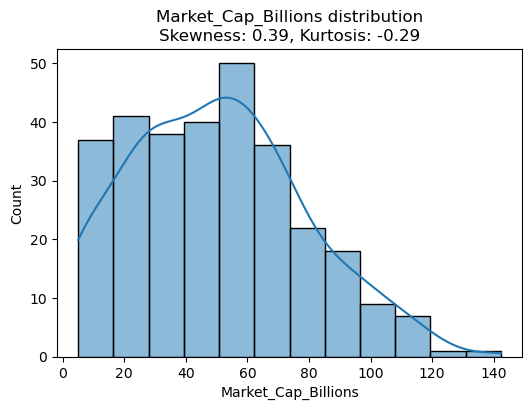

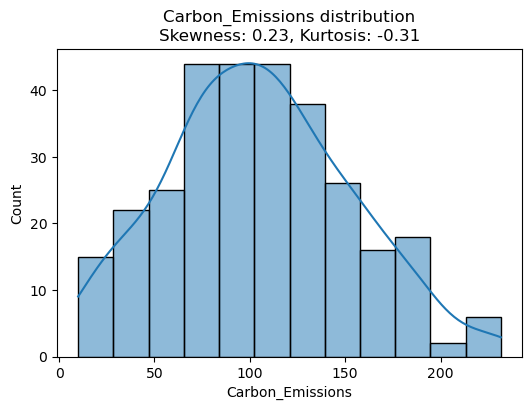

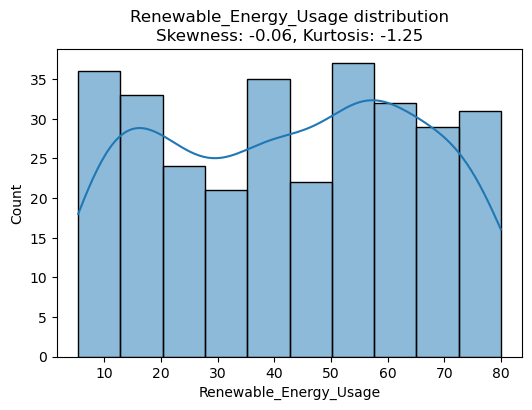

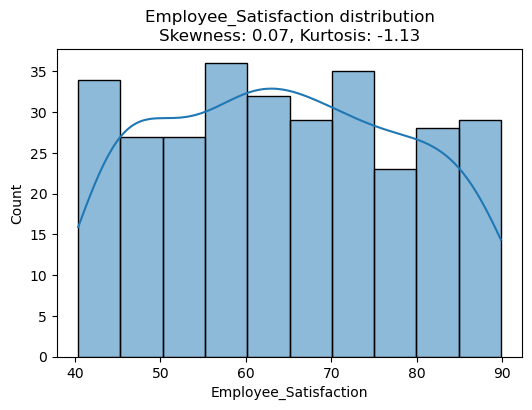

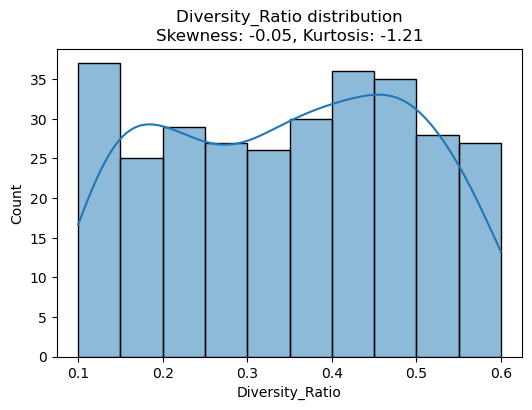

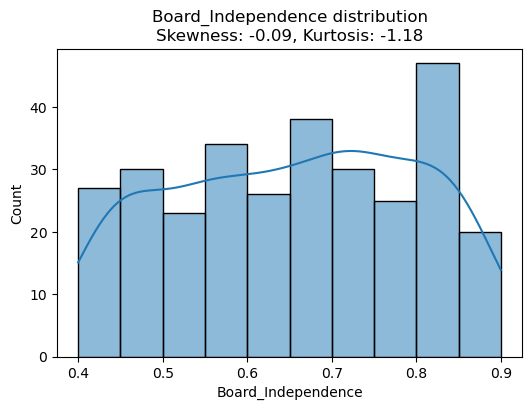

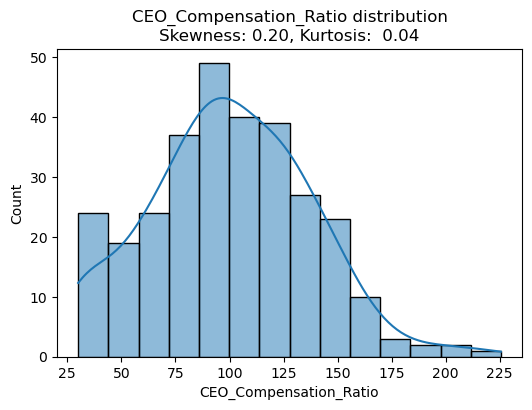

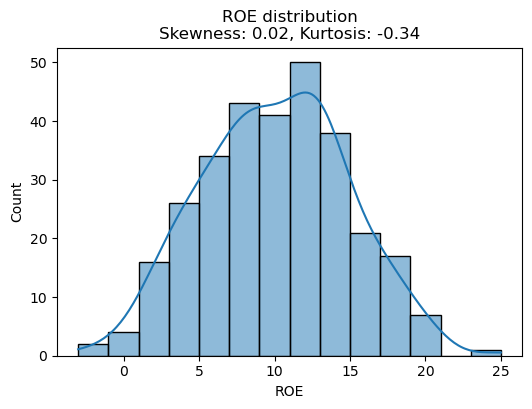

In [85]:
for col in numerical_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution\nSkewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurtosis(): .2f}')
    plt.show()

1). Handle duplicate records

In [88]:
#No duplicates, if exist need to remove using first occurrence, last occurrence by keep=last or drop column wise

2). Consistent column names

In [92]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [96]:
df.columns

Index(['company', 'sector', 'country', 'market_cap_billions',
       'carbon_emissions', 'renewable_energy_usage', 'employee_satisfaction',
       'diversity_ratio', 'board_independence', 'ceo_compensation_ratio',
       'roe', 'esg_score'],
      dtype='object')

3). Handle missing values

In [99]:
# No missing values found, if present have to deal with percentages_count and replacement with Mean/Median/Mode based on criteria or drop them

4). Handle invalid or impossible values

In [102]:
# No invalid or impossible values found, if present deal with removing or replacement of statistical methods

5). Correct data types

In [105]:
#Replacing obj with category for memory usage purposes
df['sector'] = df['sector'].astype('category')
df['country'] = df['country'].astype('category')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   company                 300 non-null    object  
 1   sector                  300 non-null    category
 2   country                 300 non-null    category
 3   market_cap_billions     300 non-null    float64 
 4   carbon_emissions        300 non-null    float64 
 5   renewable_energy_usage  300 non-null    float64 
 6   employee_satisfaction   300 non-null    float64 
 7   diversity_ratio         300 non-null    float64 
 8   board_independence      300 non-null    float64 
 9   ceo_compensation_ratio  300 non-null    float64 
 10  roe                     300 non-null    float64 
 11  esg_score               300 non-null    float64 
dtypes: category(2), float64(9), object(1)
memory usage: 24.6+ KB


6). Outlier treatment

In [110]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [112]:
df['market_cap_billions'] = pt.fit_transform(df[['market_cap_billions']])

In [114]:
plt.figure(figsize=(12,5))
sns.boxplot(df['market_cap_billions'])
plt.title('Market cap after Transformations')
plt.show()

In [115]:
df['ceo_compensation_ratio'] = pt.fit_transform(df[['ceo_compensation_ratio']])

In [118]:
plt.figure(figsize=(12,5))
sns.boxplot(df['ceo_compensation_ratio'])
plt.title('ceo_compensation_ratio after Transformations')
plt.show()

In [120]:
df['roe'] = pt.fit_transform(df[['roe']])

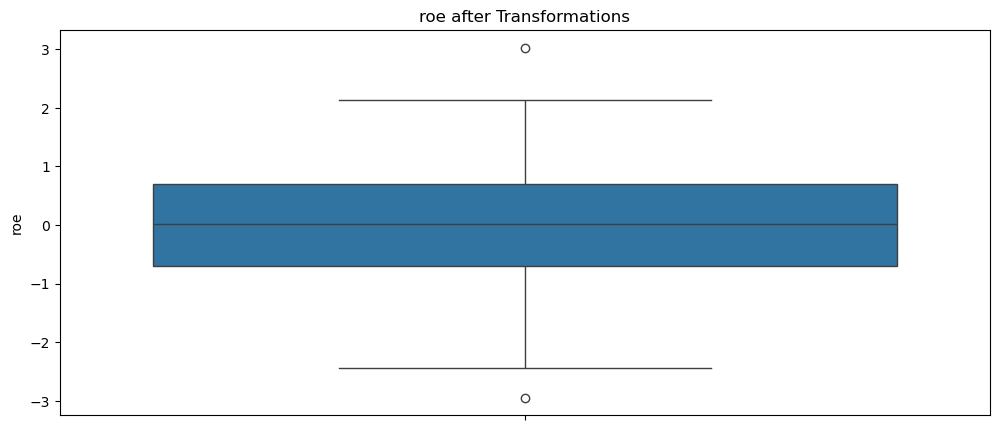

In [122]:
plt.figure(figsize=(12,5))
sns.boxplot(df['roe'])
plt.title('roe after Transformations')
plt.show()

In [124]:
df['esg_score'] = pt.fit_transform(df[['esg_score']])

In [126]:
plt.figure(figsize=(12,5))
sns.boxplot(df['esg_score'])
plt.title('esg_score after Transformations')
plt.show()

In [128]:
# Even after transformations, outliers are due to compression to the mean and extreme values. can be decoded with capping and transformations if needed

7). Encoding categorical variables & Feature Scaling in Pipelines steps

In [131]:
df.columns

Index(['company', 'sector', 'country', 'market_cap_billions',
       'carbon_emissions', 'renewable_energy_usage', 'employee_satisfaction',
       'diversity_ratio', 'board_independence', 'ceo_compensation_ratio',
       'roe', 'esg_score'],
      dtype='object')

In [133]:
# Feature engineering not required

8). Drop unncesseary columns  

In [136]:
df = df.drop('company', axis=1)

In [138]:
df.head(2)

sector country  market_cap_billions  carbon_emissions  \
0         Finance  Canada             0.428639            124.05   
1  Consumer Goods     USA            -0.024311            111.19   

   renewable_energy_usage  employee_satisfaction  diversity_ratio  \
0                   12.69                  56.23             0.43   
1                   75.29                  58.32             0.55   

   board_independence  ceo_compensation_ratio       roe  esg_score  
0                0.67                0.856600  0.515909  -0.840655  
1                0.65               -2.019298  1.170043   0.804855

Train Test Split

In [141]:
X = df.drop('esg_score', axis=1)
y = df['esg_score']

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [145]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [147]:
categorical_cols= X_train.select_dtypes(include=['object', 'category']).columns.tolist()

Feature scaling & Encoding in Pipeline method at a time

In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [152]:
preprocessor = ColumnTransformer([('num', StandardScaler(), numerical_cols), 
                                               ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)])

Multple model selection & their evaluations

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

A. Linear Regression

In [158]:
from sklearn.linear_model import LinearRegression

In [160]:
pipe_lr = Pipeline([('preprocessing', preprocessor),
                    ('model', LinearRegression())])
#Fit
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['market_cap_billions',
                                                   'carbon_emissions',
                                                   'renewable_energy_usage',
                                                   'employee_satisfaction',
                                                   'diversity_ratio',
                                                   'board_independence',
                                                   'ceo_compensation_ratio',
                                                   'roe']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'country'])])),
                ('model', LinearRegression())])

In [162]:
#Predict
y_pred_lr = pipe_lr.predict(X_test)
#Evaluate
print("Linear Regression:")
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
RMSE: 0.41055942754975544
R2 Score: 0.820780286628736


C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


B. Decision Tree Regressor

In [165]:
from sklearn.tree import DecisionTreeRegressor

In [168]:
pipe_dt = Pipeline([('preprocessing', preprocessor),
                    ('model', DecisionTreeRegressor(random_state=42))])
#Fit
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['market_cap_billions',
                                                   'carbon_emissions',
                                                   'renewable_energy_usage',
                                                   'employee_satisfaction',
                                                   'diversity_ratio',
                                                   'board_independence',
                                                   'ceo_compensation_ratio',
                                                   'roe']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'country'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [170]:
#Predict
y_pred_dt = pipe_dt.predict(X_test)
#Evaluate
print("Decision Tree Regressor:")
print("RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_dt))

Decision Tree Regressor:
RMSE: 0.8615266755496298
R2 Score: 0.21082888979626446


C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C. Random Forest Regressor

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
pipe_rf = Pipeline([('preprocessing', preprocessor),
                    ('model', RandomForestRegressor(random_state=42))])
#Fit
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['market_cap_billions',
                                                   'carbon_emissions',
                                                   'renewable_energy_usage',
                                                   'employee_satisfaction',
                                                   'diversity_ratio',
                                                   'board_independence',
                                                   'ceo_compensation_ratio',
                                                   'roe']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'country'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [177]:
#Predict
y_pred_rf = pipe_rf.predict(X_test)
#Evaluate
print("Random Forest Regressor:")
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Regressor:
RMSE: 0.5303046502339963
R2 Score: 0.7009907724588336


C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


D. Gradient Boosting Regressor

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

In [182]:
pipe_gb = Pipeline([('preprocessing', preprocessor),
                    ('model', GradientBoostingRegressor(random_state=42))])
#Fit
pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['market_cap_billions',
                                                   'carbon_emissions',
                                                   'renewable_energy_usage',
                                                   'employee_satisfaction',
                                                   'diversity_ratio',
                                                   'board_independence',
                                                   'ceo_compensation_ratio',
                                                   'roe']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'country'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [184]:
#Predict
y_pred_gb = pipe_gb.predict(X_test)
#Evaluate
print("Gradient Boosting Regressor:")
print("RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting Regressor:
RMSE: 0.4452528063900103
R2 Score: 0.7892114331740058


C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


E. XGBoost Regressor

In [189]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:05
   ---------------------------------------- 0.8/150.0 MB 1.7 MB/s eta 0:01:29
   ---------------------------------------- 1.0/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 1.6/150.0 MB 1.7 MB/s eta 0:01:27
    --------------------------------------- 2.1/150.0 MB 1.7 MB/s eta 0:01:26
    --------------------------------------- 2.6/150.0 MB 1.9 MB/s eta 0:01:19
    --------------------------------------- 3.1/150.0 MB 2.0 MB/s eta 0:01:14
   - -------------------------------------- 3.9/150.0 MB 2.2 MB/s eta 0:01:08
   - -------------------------------------- 4.5/150.0 MB 2.2 MB/s eta 0:01:06
   - -------------------------------------- 4.7/150.0 MB 2.2 MB/s eta 0:01:06
   - -------------------------------------- 5.0/150.0 MB 2.2 MB/s eta 0:01:07


In [190]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [193]:
from xgboost import XGBRegressor

In [195]:
pipe_xgb = Pipeline([('preprocessing', preprocessor),
                    ('model', XGBRegressor(random_state=42))])
#Fit
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['market_cap_billions',
                                                   'carbon_emissions',
                                                   'renewable_energy_usage',
                                                   'employee_satisfaction',
                                                   'diversity_ratio',
                                                   'board_independence',
                                                   'ceo_compensation_ratio',
                                                   'roe']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'country'])])),
                ('model',
                 XGBRe...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [197]:
#Predict
y_pred_xgb = pipe_xgb.predict(X_test)
#Evaluate
print("XGBoost Regressor:")
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost Regressor:
RMSE: 0.591213415231384
R2 Score: 0.6283601464419599


C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


F. LightGBM Regressor

In [202]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 2.6 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00


In [204]:
from lightgbm import LGBMRegressor

In [206]:
pipe_lgbm = Pipeline([('preprocessing', preprocessor),
                    ('model', LGBMRegressor(random_state=42))])
#Fit
pipe_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['market_cap_billions',
                                                   'carbon_emissions',
                                                   'renewable_energy_usage',
                                                   'employee_satisfaction',
                                                   'diversity_ratio',
                                                   'board_independence',
                                                   'ceo_compensation_ratio',
                                                   'roe']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'country'])])),
                ('model', LGBMRegressor(random_state=42))])

In [208]:
#Predict
y_pred_lgbm = pipe_lgbm.predict(X_test)
#Evaluate
print("LightGBM Regressor:")
print("RMSE:", mean_squared_error(y_test, y_pred_lgbm, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_lgbm))

LightGBM Regressor:
RMSE: 0.47918884701426473
R2 Score: 0.7558554000206937


C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [212]:
final = {'Linear Regression': ["RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False), "R2 Score:", r2_score(y_test, y_pred_lr)],
         'Decision Tree': ["RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False), "R2 Score:", r2_score(y_test, y_pred_dt)],
         'Random Forest': ["RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False), "R2 Score:", r2_score(y_test, y_pred_rf)],
         'Gradient Boost':["RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False), "R2 Score:", r2_score(y_test, y_pred_gb)],
         'XGBoost' : ["RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False), "R2 Score:", r2_score(y_test, y_pred_xgb)],
         'LightGBM': ["RMSE:", mean_squared_error(y_test, y_pred_lgbm, squared=False), "R2 Score:", r2_score(y_test, y_pred_lgbm)]}

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [214]:
print(final)

{'Linear Regression': ['RMSE:', 0.41055942754975544, 'R2 Score:', 0.820780286628736], 'Decision Tree': ['RMSE:', 0.8615266755496298, 'R2 Score:', 0.21082888979626446], 'Random Forest': ['RMSE:', 0.5303046502339963, 'R2 Score:', 0.7009907724588336], 'Gradient Boost': ['RMSE:', 0.4452528063900103, 'R2 Score:', 0.7892114331740058], 'XGBoost': ['RMSE:', 0.591213415231384, 'R2 Score:', 0.6283601464419599], 'LightGBM': ['RMSE:', 0.47918884701426473, 'R2 Score:', 0.7558554000206937]}


In [216]:
results = pd.DataFrame(final)
print(results)

  Linear Regression Decision Tree Random Forest Gradient Boost    XGBoost  \
0             RMSE:         RMSE:         RMSE:          RMSE:      RMSE:   
1          0.410559      0.861527      0.530305       0.445253   0.591213   
2         R2 Score:     R2 Score:     R2 Score:      R2 Score:  R2 Score:   
3           0.82078      0.210829      0.700991       0.789211    0.62836   

    LightGBM  
0      RMSE:  
1   0.479189  
2  R2 Score:  
3   0.755855  


In [218]:
# As per RMSE we have to consider the lower=better model performance
# As per R2 we have to consider the higher=better model performance

In [220]:
#Now, we can consider Linear, Gradient and LightGBM to tune and evaluate , selecting the best model

Hyperparameter Tuning using Optuna

In [223]:
!pip install optuna

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


In [225]:
#For Linear Regression tuning not necessary

In [227]:
import optuna

1. Gradient Boost tuning with optuna

In [242]:
#Define objective function for optuna
def objective(trial):
    #Hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50,100)
    max_depth = trial.suggest_int('max_depth',2,10)
    learning_rate = trial.suggest_float('learning_rate', 0.01,0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    #Define model with suggest hyperparameters
    model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    #Define Pipeline
    pipe= Pipeline([('preprocessing', preprocessor), ('model', model)])
    #Fit on training data
    pipe.fit(X_train, y_train)
    #Predict on test data
    y_pred = pipe.predict(X_test)
    #Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

In [244]:
#Run optuna study
study= optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:")
print(study.best_trial)

[I 2025-07-05 16:23:42,138] A new study created in memory with name: no-name-277d0808-a0dc-47e6-9edf-57077d84261f
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:23:42,221] Trial 0 finished with value: 0.5116847519733241 and parameters: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1933492776721108, 'subsample': 0.86201603659423, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.5116847519733241.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:23:42,336] Trial 1 finished with value: 0.57945930

Best trial:
FrozenTrial(number=43, state=1, values=[0.4138551185416945], datetime_start=datetime.datetime(2025, 7, 5, 16, 23, 45, 841256), datetime_complete=datetime.datetime(2025, 7, 5, 16, 23, 45, 918092), params={'n_estimators': 67, 'max_depth': 8, 'learning_rate': 0.07708362954138409, 'subsample': 0.5793667144118958, 'min_samples_split': 9, 'min_samples_leaf': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=100, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1)}, trial_id=43, value=None)


In [248]:
#Train final model with best hyperparameters
best_params = study.best_params
final_model = GradientBoostingRegressor(**best_params, random_state=42)
pipe_gb_tuned = Pipeline([('preprocessing', preprocessor),
                          ('model', final_model)])
pipe_gb_tuned.fit(X_train, y_train)
y_pred_gb_tuned = pipe_gb_tuned.predict(X_test)
print("Tuned Gradient Boosting Regressor:")
print("RMSE:", mean_squared_error(y_test, y_pred_gb_tuned, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_gb_tuned))

Tuned Gradient Boosting Regressor:
RMSE: 0.4138551185416945
R2 Score: 0.8178914309163454


C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#Before Tuning
RMSE: 0.44 , R2: 0.78
#After Tuning
RMSE: 0.41, R2: 0.81
#Conclusion: After tuning performance enhanced

2. LightGBM tuning with optuna

In [258]:
#Define objective function for optuna
def objective(trial):
    #Hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50,1000)
    max_depth = trial.suggest_int('max_depth',3,10)
    learning_rate = trial.suggest_float('learning_rate', 0.005,0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    num_leaves = trial.suggest_int('num_leaves', 20, 300)
    #Define model with suggest hyperparameters
    model = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample, num_leaves=num_leaves, random_state=42)
    #Define Pipeline
    pipe= Pipeline([('preprocessing', preprocessor), ('model', model)])
    #Fit on training data
    pipe.fit(X_train, y_train)
    #Predict on test data
    y_pred = pipe.predict(X_test)
    #Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

In [260]:
#Run optuna study
study= optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:")
print(study.best_trial)

[I 2025-07-05 16:41:23,810] A new study created in memory with name: no-name-f885700b-b021-4ba3-91c9-04416bf95c59
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:23,855] Trial 0 finished with value: 0.4648892943121209 and parameters: {'n_estimators': 281, 'max_depth': 10, 'learning_rate': 0.03441792547555927, 'subsample': 0.7858278387781903, 'num_leaves': 59}. Best is trial 0 with value: 0.4648892943121209.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:23,947] Trial 1 finished with value: 0.4849340999907948 and parameters:

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,023] Trial 2 finished with value: 0.48128421029101887 and parameters: {'n_estimators': 564, 'max_depth': 4, 'learning_rate': 0.0072580634884021255, 'subsample': 0.92269424993537, 'num_leaves': 280}. Best is trial 0 with value: 0.4648892943121209.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,066] Trial 3 finished with value: 0.5051739298268421 and parameters: {'n_estimators': 358, 'max_depth': 3, 'learning_rate': 0.277237752332863, 'subsample': 0.5005381028383857, 'num_

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,248] Trial 6 finished with value: 0.4595536964166655 and parameters: {'n_estimators': 473, 'max_depth': 5, 'learning_rate': 0.01046686734190601, 'subsample': 0.9142260797349606, 'num_leaves': 279}. Best is trial 6 with value: 0.4595536964166655.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,412] Trial 7 finished with value: 0.48855067153349446 and parameters: {'n_estimators': 848, 'max_depth': 9, 'learning_rate': 0.03763833229855737, 'subsample': 0.5488038464363973, 'num_leaves': 290}. Best is trial 6 with value: 0.4595536964166655.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,431] Trial 8 finished with value: 0.48064766125877406 and parameters: {'n_estimators': 105, 'max_depth': 3, 'learning_rate': 0.11138977060268915, 'subsample': 0.5217541601110394, 'n

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,659] Trial 11 finished with value: 0.4581113879902842 and parameters: {'n_estimators': 426, 'max_depth': 6, 'learning_rate': 0.015553920834450436, 'subsample': 0.7998278884436458, 'num_leaves': 234}. Best is trial 11 with value: 0.4581113879902842.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,739] Trial 12 finished with value: 0.4530313537799573 and parameters: {'n_estimators': 469, 'max_depth': 6, 'learning_rate': 0.010920533759737516, 'subsample': 0.8230658586261396,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,826] Trial 13 finished with value: 0.5058256884109265 and parameters: {'n_estimators': 497, 'max_depth': 6, 'learning_rate': 0.0680566531340159, 'subsample': 0.8187694676870426, 'num_leaves': 234}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:24,931] Trial 14 finished with value: 0.4754153661763315 and parameters: {'n_estimators': 689, 'max_depth': 7, 'learning_rate': 0.021389306224107178, 'subsample': 0.6921387679664811, '

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,060] Trial 16 finished with value: 0.472416397896482 and parameters: {'n_estimators': 137, 'max_depth': 8, 'learning_rate': 0.07703866329734545, 'subsample': 0.7149438853532178, 'num_leaves': 197}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,115] Trial 17 finished with value: 0.5661718518325163 and parameters: {'n_estimators': 191, 'max_depth': 5, 'learning_rate': 0.00931625614213529, 'subsample': 0.8601292888732937, 'n

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,273] Trial 19 finished with value: 0.48324194965193557 and parameters: {'n_estimators': 561, 'max_depth': 6, 'learning_rate': 0.05648972035731237, 'subsample': 0.6202122245070429, 'num_leaves': 164}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,381] Trial 20 finished with value: 0.46276204799446746 and parameters: {'n_estimators': 735, 'max_depth': 7, 'learning_rate': 0.018751010279222245, 'subsample': 0.7348344178694356

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,542] Trial 22 finished with value: 0.46861077889003366 and parameters: {'n_estimators': 370, 'max_depth': 5, 'learning_rate': 0.01246179833617496, 'subsample': 0.9898160139757851, 'num_leaves': 259}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,644] Trial 23 finished with value: 0.4589329291642517 and parameters: {'n_estimators': 619, 'max_depth': 6, 'learning_rate': 0.0084382469693992, 'subsample': 0.7941692972848935, '

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,751] Trial 24 finished with value: 0.46001382620551257 and parameters: {'n_estimators': 641, 'max_depth': 6, 'learning_rate': 0.0075599628168300705, 'subsample': 0.8038311560253796, 'num_leaves': 229}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,878] Trial 25 finished with value: 0.46846113665636185 and parameters: {'n_estimators': 812, 'max_depth': 7, 'learning_rate': 0.005452310039428115, 'subsample': 0.75712778803825

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:25,972] Trial 26 finished with value: 0.45904027335600084 and parameters: {'n_estimators': 551, 'max_depth': 6, 'learning_rate': 0.014711017617086304, 'subsample': 0.8320113432812838, 'num_leaves': 264}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,079] Trial 27 finished with value: 0.462500809998977 and parameters: {'n_estimators': 644, 'max_depth': 8, 'learning_rate': 0.008092536552948382, 'subsample': 0.650979709682294, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,149] Trial 28 finished with value: 0.4653610737678648 and parameters: {'n_estimators': 281, 'max_depth': 7, 'learning_rate': 0.025872865062450918, 'subsample': 0.7265364692312422, 'num_leaves': 273}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,217] Trial 29 finished with value: 0.4730128500080148 and parameters: {'n_estimators': 298, 'max_depth': 9, 'learning_rate': 0.04939512768628623, 'subsample': 0.7960085642915647, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,394] Trial 31 finished with value: 0.46307934679549084 and parameters: {'n_estimators': 562, 'max_depth': 6, 'learning_rate': 0.013744406062124199, 'subsample': 0.8373425665462637, 'num_leaves': 263}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,493] Trial 32 finished with value: 0.48633409121173343 and parameters: {'n_estimators': 592, 'max_depth': 6, 'learning_rate': 0.03042390616541257, 'subsample': 0.7775833764668518

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,583] Trial 33 finished with value: 0.45666890726191883 and parameters: {'n_estimators': 516, 'max_depth': 5, 'learning_rate': 0.016965563185462076, 'subsample': 0.8311124795120013, 'num_leaves': 268}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,659] Trial 34 finished with value: 0.4947502179096315 and parameters: {'n_estimators': 523, 'max_depth': 4, 'learning_rate': 0.006987818746363468, 'subsample': 0.9520381401564654

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,747] Trial 35 finished with value: 0.45358801203996163 and parameters: {'n_estimators': 625, 'max_depth': 5, 'learning_rate': 0.01012028224174063, 'subsample': 0.8907805575047165, 'num_leaves': 247}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:26,819] Trial 36 finished with value: 0.49782560815836957 and parameters: {'n_estimators': 401, 'max_depth': 4, 'learning_rate': 0.2511745016408914, 'subsample': 0.8912402988265958, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,030] Trial 39 finished with value: 0.4593502698716257 and parameters: {'n_estimators': 335, 'max_depth': 3, 'learning_rate': 0.03323491622145161, 'subsample': 0.816580001103042, 'num_leaves': 206}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,090] Trial 40 finished with value: 0.4884576211038836 and parameters: {'n_estimators': 208, 'max_depth': 5, 'learning_rate': 0.016433486083684747, 'subsample': 0.858175956012549, 'n

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,269] Trial 42 finished with value: 0.45773306804307584 and parameters: {'n_estimators': 499, 'max_depth': 5, 'learning_rate': 0.011437207772154805, 'subsample': 0.9328862674511181, 'num_leaves': 278}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,357] Trial 43 finished with value: 0.4624062873654761 and parameters: {'n_estimators': 537, 'max_depth': 4, 'learning_rate': 0.010109060033504213, 'subsample': 0.9291441159071739

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,444] Trial 44 finished with value: 0.47738231008834336 and parameters: {'n_estimators': 609, 'max_depth': 5, 'learning_rate': 0.006778211893466857, 'subsample': 0.8986257402597244, 'num_leaves': 275}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,530] Trial 45 finished with value: 0.4573770285244982 and parameters: {'n_estimators': 514, 'max_depth': 4, 'learning_rate': 0.024778375182984282, 'subsample': 0.9732434554369513

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,615] Trial 46 finished with value: 0.46496403482134024 and parameters: {'n_estimators': 502, 'max_depth': 4, 'learning_rate': 0.026371511993489343, 'subsample': 0.9723472422019236, 'num_leaves': 299}. Best is trial 12 with value: 0.4530313537799573.
C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,704] Trial 47 finished with value: 0.463031521022051 and parameters: {'n_estimators': 686, 'max_depth': 3, 'learning_rate': 0.022256449065562286, 'subsample': 0.9677076570560549,

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-07-05 16:41:27,868] Trial 49 finished with value: 0.4585833003043658 and parameters: {'n_estimators': 588, 'max_depth': 4, 'learning_rate': 0.013020249565010135, 'subsample': 0.9255319067170146, 'num_leaves': 282}. Best is trial 12 with value: 0.4530313537799573.


Best trial:
FrozenTrial(number=12, state=1, values=[0.4530313537799573], datetime_start=datetime.datetime(2025, 7, 5, 16, 41, 24, 659444), datetime_complete=datetime.datetime(2025, 7, 5, 16, 41, 24, 739433), params={'n_estimators': 469, 'max_depth': 6, 'learning_rate': 0.010920533759737516, 'subsample': 0.8230658586261396, 'num_leaves': 243}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=True, low=0.005, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'num_leaves': IntDistribution(high=300, log=False, low=20, step=1)}, trial_id=12, value=None)


In [262]:
#Train final model with best hyperparameters
best_params = study.best_params
final_model = LGBMRegressor(**best_params, random_state=42)
pipe_lgbm_tuned = Pipeline([('preprocessing', preprocessor),
                          ('model', final_model)])
pipe_lgbm_tuned.fit(X_train, y_train)
y_pred_lgbm_tuned = pipe_lgbm_tuned.predict(X_test)
print("Tuned LGBM Regressor:")
print("RMSE:", mean_squared_error(y_test, y_pred_lgbm_tuned, squared=False))
print("R2 Score:", r2_score(y_test, y_pred_lgbm_tuned))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 18
[LightGBM] [Info] Start training from score 0.010964
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#Before Tuning
RMSE: 0.47 , R2: 0.75
#After Tuning
RMSE: 0.45, R2: 0.78
#Conclusion: After tuning performance enhanced

In [265]:
# Conclusion: Gradient Boosting performing best after tuning with low RMSE & High R2 Score, saving it for future predictions

Model Saving & Versioning

In [268]:
pip install mlflow

   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.7 MB ? eta -:--:--
    --------------------------------------- 0.5/24.7 MB 1.7 MB/s eta 0:00:15
   - -------------------------------------- 1.0/24.7 MB 2.1 MB/s eta 0:00:12
   -- ------------------------------------- 1.3/24.7 MB 1.8 MB/s eta 0:00:13
   -- ------------------------------------- 1.8/24.7 MB 2.0 MB/s eta 0:00:12
   --- ------------------------------------ 2.4/24.7 MB 2.1 MB/s eta 0:00:11
   ---- ----------------------------------- 2.6/24.7 MB 1.9 MB/s eta 0:00:12
   ----- ---------------------------------- 3.1/24.7 MB 2.0 MB/s eta 0:00:11
   ----- ---------------------------------- 3.7/24.7 MB 2.1 MB/s eta 0:00:11
   ------ --------------------------------- 4.2/24.7 MB 2.1 MB/s eta 0:00:10
   ------- -------------------------------- 4.7/24.7 MB 2.2 MB/s eta 0:00:10
   -------- ------------------------------- 5.2/24.7 MB 2.2 MB/s eta 0:00:09
   -------- -

In [270]:
 #import mlflow
import mlflow
import mlflow.sklearn
#Log and register model
# start an mlflow run
with mlflow.start_run():
    #log parameters from best_params
    mlflow.log_params(best_params)
    #log metrics
    rmse = mean_squared_error(y_test,y_pred_gb_tuned, squared=False)
    r2 = r2_score(y_test, y_pred_gb_tuned)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r2)
    #log the pipeline model
    mlflow.sklearn.log_model(sk_model=pipe_gb_tuned, artifact_path="gradient_boosting-pipeline_model", registered_model_name="GradientBoostingPipelineModel")
    print("Model saved to mlflow & registered successfully.")

2025/07/05 17:22:06 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

C:\Users\venuk\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' 

Model saved to mlflow & registered successfully.


Successfully registered model 'GradientBoostingPipelineModel'.
Created version '1' of model 'GradientBoostingPipelineModel'.


Model Loading & predicting on sample data

In [273]:
new_data = pd.DataFrame([{
    'Sector': 'Technology',
    'Country': 'USA',
    'Market_Cap_Billions': 120,
    'Carbon_Emissions': 30,
    'Renewable_Energy_Usage': 50,
    'Employee_Satisfaction': 85,
    'Diversity_Ratio': 0.4,
    'Board_Independence': 0.8,
    'CEO_Compensation_Ratio': 90,
    'ROE': 15
}])

In [275]:
print(new_data)

       Sector Country  Market_Cap_Billions  Carbon_Emissions  \
0  Technology     USA                  120                30   

   Renewable_Energy_Usage  Employee_Satisfaction  Diversity_Ratio  \
0                      50                     85              0.4   

   Board_Independence  CEO_Compensation_Ratio  ROE  
0                 0.8                      90   15  


In [283]:
#model loading for predictions on sample
import mlflow.pyfunc
model = mlflow.sklearn.load_model (model_uri="models:/GradientBoostingPipelineModel/1")

In [287]:
new_data.dtypes

Sector                     object
Country                    object
Market_Cap_Billions         int64
Carbon_Emissions            int64
Renewable_Energy_Usage      int64
Employee_Satisfaction       int64
Diversity_Ratio           float64
Board_Independence        float64
CEO_Compensation_Ratio      int64
ROE                         int64
dtype: object

In [295]:
new_data['Sector'] = new_data['Sector'].astype('category')
new_data['Country'] = new_data['Country'].astype('category')

In [299]:
new_data.dtypes

Sector                    category
Country                   category
Market_Cap_Billions          int64
Carbon_Emissions             int64
Renewable_Energy_Usage       int64
Employee_Satisfaction        int64
Diversity_Ratio            float64
Board_Independence         float64
CEO_Compensation_Ratio       int64
ROE                          int64
dtype: object

In [305]:
new_data.columns

Index(['Sector', 'Country', 'Market_Cap_Billions', 'Carbon_Emissions',
       'Renewable_Energy_Usage', 'Employee_Satisfaction', 'Diversity_Ratio',
       'Board_Independence', 'CEO_Compensation_Ratio', 'ROE'],
      dtype='object')

In [307]:
X_train.columns

Index(['sector', 'country', 'market_cap_billions', 'carbon_emissions',
       'renewable_energy_usage', 'employee_satisfaction', 'diversity_ratio',
       'board_independence', 'ceo_compensation_ratio', 'roe'],
      dtype='object')

In [311]:
#Column names are not matching with Caps, so decode it now.
new_data.columns = new_data.columns.str.strip().str.lower().str.replace(' ','_')

In [313]:
new_data.columns

Index(['sector', 'country', 'market_cap_billions', 'carbon_emissions',
       'renewable_energy_usage', 'employee_satisfaction', 'diversity_ratio',
       'board_independence', 'ceo_compensation_ratio', 'roe'],
      dtype='object')

In [315]:
#Prediction on sample new data
predict = model.predict(new_data)

In [317]:
print(predict)

[1.39872125]


Streamlit GUI creation

In [329]:
model = mlflow.sklearn.load_model (model_uri="models:/GradientBoostingPipelineModel/1")
import streamlit as st
import mlflow.sklearn
st.title("ESG Score Prediction App")
#choose mode as file uploading
st.write("Upload a CSV file containing required features to predict ESG scores.")
uploaded_file = st.file_uploader("Upload input CSV file", type=["csv"])
if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
    st.write("Uploaded Data Preview:", input_df.head())
    if st.button("Predict ESG Scores"):
        try:
            predictions = model.predict(input_df)
            input_df['Predicted_ESG_Score']= predictions
            st.success("Predictions generated successfully!")
            st.write(input_df)
            csv=input_df.to_csv(index=False).encode('utf-8')
            st.download_button("Download Predictions", csv,"esg_predictions.csv", "text/csv")
        except Exception as e:
            st.error(f"Error during prediction: {e}")
            st.info("Please upload a csv file to begin.")

2025-07-05 18:49:19.666 
  command:

    streamlit run C:\Users\venuk\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
